In [1]:
!pip install wget

In [1]:
import os
import wget  # Used for Downloading Stuff. We will use it to download our Model

In [2]:
MODEL_NAME = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
MODEL_URL = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"

# Lets Downlad the TF Model Pretrained Model from Tensorflow Model Zoo and Install tensorflow Object Detection API

In [3]:
paths = {
    'MODEL_PATH': os.path.join('Workspace','Models'),
    'PROTOC_PATH': os.path.join('Workspace','protoc'),
    'PRETRAIN_MODEL': os.path.join('Workspace','Pretrained'),
    'SCRIPTS_PATH': os.path.join('Workspace','Scripts'),
    'ANNOTATION_PATH': os.path.join('Workspace','Annotations'),
    'CHECKPOINT_PATH': os.path.join('Workspace','My_Model',MODEL_NAME), 
    'IMAGE_PATH' : os.path.join('Workspace','Images'),
    'MUSIK_PATH' : os.path.join('Workspace','Musik')
}

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Workspace','My_Model', MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [12]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        elif os.name == 'nt':
            !mkdir {path}

In [8]:
if not os.path.exists(os.path.join(paths['MODEL_PATH'],'research','object_detection')):
    !git clone "https://github.com/tensorflow/models" {paths['MODEL_PATH']}  #Cloning the entire Repository we will use object detection api

Cloning into 'Workspace\Models'...
Updating files:  29% (704/2415)
Updating files:  30% (725/2415)
Updating files:  31% (749/2415)
Updating files:  32% (773/2415)
Updating files:  33% (797/2415)
Updating files:  34% (822/2415)
Updating files:  35% (846/2415)
Updating files:  36% (870/2415)
Updating files:  37% (894/2415)
Updating files:  38% (918/2415)
Updating files:  39% (942/2415)
Updating files:  40% (966/2415)
Updating files:  41% (991/2415)
Updating files:  42% (1015/2415)
Updating files:  43% (1039/2415)
Updating files:  44% (1063/2415)
Updating files:  45% (1087/2415)
Updating files:  46% (1111/2415)
Updating files:  47% (1136/2415)
Updating files:  48% (1160/2415)
Updating files:  49% (1184/2415)
Updating files:  50% (1208/2415)
Updating files:  51% (1232/2415)
Updating files:  52% (1256/2415)
Updating files:  53% (1280/2415)
Updating files:  54% (1305/2415)
Updating files:  55% (1329/2415)
Updating files:  56% (1353/2415)
Updating files:  57% (1377/2415)
Updating files:  58% 

In [21]:
# Now lets install Object detection API. But the problem is it uses Protocol Buffers so we need to make sure that we have got 
# that installed.
# https://github.com/protocolbuffers/protobuf  ===> We cant install protobuf compiler using pip so we will use the official Repository
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Workspace/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Workspace/models/research/slim && pip install -e .



 59% [............................................                              ]  876544 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 Datei(en) verschoben.
        1 Datei(en) kopiert.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.p

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
c:\users\gopu\appdata\local\temp\easy_install-hwb1unn0\pycocotools-2.0.2\.eggs\cython-3.0a6-py3.7-win-amd64.egg\Cython\Compiler\Main.py:344: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\Gopu\AppData\Local\Temp\easy_install-hwb1unn0\pycocotools-2.0.2\pycocotools\_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-37: module references __file__
error: [WinError 5] Zugriff verweigert: 'C:\\Users\\Gopu\\AppData\\Local\\Temp\\easy_install-hwb1unn0\\pycocotools-2.0.2\\.egg


copying object_detection\core\batch_multiclass_nms_test.py -> build\lib\object_detection\core
copying object_detection\core\box_coder.py -> build\lib\object_detection\core
copying object_detection\core\box_coder_test.py -> build\lib\object_detection\core
copying object_detection\core\box_list.py -> build\lib\object_detection\core
copying object_detection\core\box_list_ops.py -> build\lib\object_detection\core
copying object_detection\core\box_list_ops_test.py -> build\lib\object_detection\core
copying object_detection\core\box_list_test.py -> build\lib\object_detection\core
copying object_detection\core\box_predictor.py -> build\lib\object_detection\core
copying object_detection\core\class_agnostic_nms_test.py -> build\lib\object_detection\core
copying object_detection\core\data_decoder.py -> build\lib\object_detection\core
copying object_detection\core\data_parser.py -> build\lib\object_detection\core
copying object_detection\core\densepose_ops.py -> build\lib\object_detection\core
c

byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v1_fpn_keras_feature_extractor.py to ssd_mobilenet_v1_fpn_keras_feature_extractor.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v1_keras_feature_extractor.py to ssd_mobilenet_v1_keras_feature_extractor.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v1_ppn_feature_extractor.py to ssd_mobilenet_v1_ppn_feature_extractor.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v1_ppn_feature_extractor_tf1_test.py to ssd_mobilenet_v1_ppn_feature_extractor_tf1_test.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v2_feature_extractor.py to ssd_mobilenet_v2_feature_extractor.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v2_feature_extractor_tf1_test.py to ssd_mobilenet_v2_feature_extractor_tf1_

Obtaining file:///C:/Users/Gopu/Desktop/DeepFacialObjectDetection/Workspace/Models/research/slim

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.



  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Running setup.py develop for slim


object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
tf-models-official 2.4.0 requires Cython, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires gin-config, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.4.0 requires matplotlib, which is not installed.
tf-models-official 2.4.0 requires oauth2client, which is not installed.
tf-models-official 2.4.0 requires opencv-python-headless, which is not in

In [23]:
!pip install tensorflow

  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached grpcio-1.32.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
tf-models-official 2.4.0 requires Cython, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires gin-config, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.


  Using cached numpy-1.19.5-cp37-cp37m-win_amd64.whl (13.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached google_auth-1.30.0-py2.py3-none-any.whl (146 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached reque

In [25]:
!pip install matplotlib

  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl (51 kB)
  Using cached Pillow-8.2.0-cp37-cp37m-win_amd64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
tf-models-official 2.4.0 requires Cython, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires gin-config, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.4.0 requires oauth2client, which is not installed.
tf-models-official 2.4.0 requ

In [27]:
!pip install pyyaml

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.4.0 requires Cython, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires gin-config, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.4.0 requires oauth2client, which is not installed.
tf-models-official 2.4.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.4.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.4.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.4.0 requires sentencepiece, which is not


  Using cached PyYAML-5.4.1-cp37-cp37m-win_amd64.whl (210 kB)


In [28]:
VERIFICATION_SCRIPT = os.path.join(paths['MODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}


9412608/9406464 [==============================] - 3s 0us/step


2021-05-10 21:43:03.075581: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.7.7: C:\Users\Gopu\Desktop\DeepFacialObjectDetection\Expression\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
2021-05-10 21:43:16.281418: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-10 21:43:16.417606: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-05-10 21:43:17.913609: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce 920M computeCapability: 3.5
coreClock: 0.954GHz coreCount: 2 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 13.41GiB/s
2021-05-10 21:43:17.913724: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successf

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.01s
I0510 21:44:59.987334  8752 test_util.py:2076] time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.01s
[       OK ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
[ RUN      ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
I0510 21:44:59.991282  8752 test_util.py:2076] time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
[ RUN      ] ModelBuilderTF2Test.test_invalid_model_config_proto
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_model_config_proto): 0.0s
I0510 21:44:59.992281  8752 test_util.py:2076] time(__main__.ModelBuilderTF2Test.test_invalid_model_config_proto): 0.0s
[       OK ] ModelBuilderTF2Test.test

In [5]:
!pip install tensorflow --upgrade

In [6]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.16.0
Uninstalling protobuf-3.16.0:
  Successfully uninstalled protobuf-3.16.0
Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Successfully uninstalled matplotlib-3.4.2
  Using cached protobuf-3.16.0-cp37-cp37m-win_amd64.whl (904 kB)
  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
tf-models-official 2.4.0 requires Cython, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires gin-config, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.4.0 requires oauth2client, which is not installed.
tf-models-official 2.4.0 requ

In [7]:
import object_detection

In [8]:
!pip list

Package                 Version   Location
----------------------- --------- ------------------------------------------------------------------------------
absl-py                 0.12.0
astunparse              1.6.3
backcall                0.2.0
cachetools              4.2.2
certifi                 2020.12.5
chardet                 4.0.0
colorama                0.4.4
cycler                  0.10.0
decorator               5.0.7
flatbuffers             1.12
gast                    0.3.3
google-auth             1.30.0
google-auth-oauthlib    0.4.4
google-pasta            0.2.0
grpcio                  1.32.0
h5py                    2.10.0
idna                    2.10
importlib-metadata      4.0.1
ipykernel               5.5.4
ipython                 7.23.1
ipython-genutils        0.2.0
jedi                    0.18.0
jupyter-client          6.1.12
jupyter-core            4.7.1
Keras-Preprocessing     1.1.2
kiwisolver              1.3.1
lvis                    0.5.3
lxml                    

In [47]:
if os.name =='posix':
    !wget {MODEL_URL}
    !mv {MODEL_NAME+'.tar.gz'} {paths['PRETRAIN_MODEL']}
    !cd {paths['PRETRAIN_MODEL']} && tar -zxvf {MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(MODEL_URL)
    !move {MODEL_NAME+'.tar.gz'} {paths['PRETRAIN_MODEL']}
    !cd {paths['PRETRAIN_MODEL']} && tar -zxvf {MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 Datei(en) verschoben.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [27]:
labels = [{'name':'Angry', 'id':1}, {'name':'Crazy', 'id':2}, {'name':'Happy', 'id':3}, {'name':'Sad', 'id':4},
         {'name':'Shocked', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [28]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [31]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Workspace\Annotations\train.record
Successfully created the TFRecord file: Workspace\Annotations\test.record


In [26]:
!pip install pytz

  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [37]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAIN_MODEL'], MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAIN_MODEL'], MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 Datei(en) kopiert.


In [5]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [6]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [7]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [41]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAIN_MODEL'], MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [42]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

In [43]:
TRAINING_SCRIPT = os.path.join(paths['MODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [44]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [45]:
print(command)

python Workspace\Models\research\object_detection\model_main_tf2.py --model_dir=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --num_train_steps=2000


# Evaluate the Model

In [46]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [47]:
print(command)

python Workspace\Models\research\object_detection\model_main_tf2.py --model_dir=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 --pipeline_config_path=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8\pipeline.config --checkpoint_dir=Workspace\My_Model\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


In [8]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [9]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [10]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [12]:
category_index

{1: {'id': 1, 'name': 'Angry'},
 2: {'id': 2, 'name': 'Crazy'},
 3: {'id': 3, 'name': 'Happy'},
 4: {'id': 4, 'name': 'Sad'},
 5: {'id': 5, 'name': 'Shocked'}}

In [75]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Crazya0b2a346-b178-11eb-845e-5800e32a06be.jpg')

{'detection_boxes': <tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.08922181, 0.13951933, 0.7539432 , 0.60741043],
        [0.1907065 , 0.0271596 , 0.67079383, 0.68281925],
        [0.07944936, 0.14800282, 0.772008  , 0.61107427],
        [0.06438267, 0.        , 0.8984464 , 0.89069915],
        [0.07944936, 0.14800282, 0.772008  , 0.61107427],
        [0.        , 0.04573321, 0.88657427, 0.83315396],
        [0.11140111, 0.01520413, 0.7574626 , 0.7884915 ],
        [0.64951485, 0.6658503 , 1.        , 0.9904536 ],
        [0.05711156, 0.        , 0.6886078 , 0.20644823],
        [0.07979941, 0.14338519, 0.7588671 , 0.6080652 ],
        [0.24958959, 0.08649755, 0.57768416, 0.62973714],
        [0.64951485, 0.6658503 , 1.        , 0.9904536 ],
        [0.10517862, 0.12315148, 0.9336668 , 0.739582  ],
        [0.07393442, 0.01697782, 0.5203147 , 0.68652654],
        [0.        , 0.        , 1.        , 1.        ],
        [0.        , 0.        , 1.        , 1.        ],

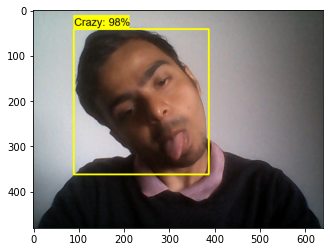

In [77]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)


num_detections = int(detections.pop('num_detections'))

detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}


detections['num_detections'] = num_detections


# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)


plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
!pip uninstall opencv-python-headless -y

In [9]:
# Without Mood Player

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [7]:
!pip install pygame

In [13]:
import numpy as np
from pygame import mixer

pygame 2.0.1 (SDL 2.0.14, Python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [28]:
# With Mood Player

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
Previous_class = None

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    Class_value = detections['detection_classes'][0]+label_id_offset
    
    # Playing the Music
    if Previous_class != Class_value:  
        mixer.music.stop()
        Previous_class = Class_value
        mixer.init()
        Class_Name = category_index[Class_value]["name"]
        Music = os.path.join(paths['MUSIK_PATH'],str(Class_Name))
        Music_Nummer = np.random.randint(0,len(os.listdir(Music)))
        mixer.music.load(os.path.join(os.path.abspath(Music),os.listdir(Music)[Music_Nummer]))
        mixer.music.play()
        
    if cv2.waitKey(10) & 0xFF == ord('p'):
        mixer.music.pause()
    
    if cv2.waitKey(10) & 0xFF == ord('r'):
        mixer.music.unpause()
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break